In [4]:
import scanpy as sc

In [5]:
adata = sc.read_h5ad('../Gaulton.h5ad')

In [3]:
adata.X.max()

np.float32(9.057543)

In [6]:
adata_subset = adata[adata.obs['Diabetes Status'].isin(['T1D', 'ND'])].copy()

In [5]:
umap_palette = {
    'Alpha': '#1f77b4',
    'Acinar': '#ff7f0e',
    'Beta': '#2ca02c',
    'Ductal': '#d62728',
    'Active Stellate': '#9467bd',
    'Endothelial': '#8c564b',
    'Alpha+Beta': '#e377c2',
    'Delta': '#7f7f7f',
    'Quiescent Stellate': '#bcbd22',
    'Macrophage': '#17becf',
    'Gamma+Epsilon': '#aec7e8',
    'MUC5B+ Ductal': '#ffbb78',
    'Mast': '#98df8a',
    'Cycling Alpha': '#ff9896'
}

In [6]:
import gc
gc.collect()

100

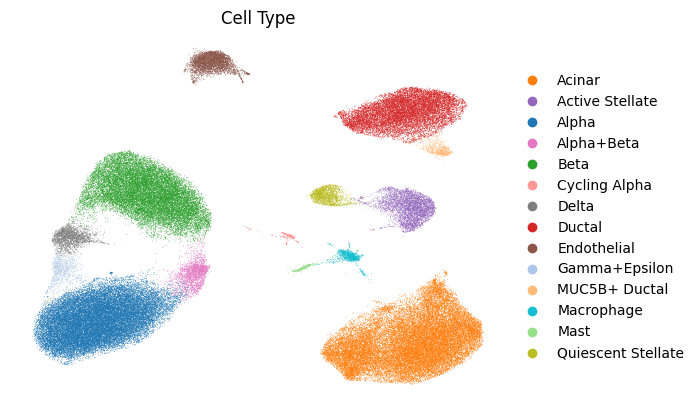

In [7]:
sc.pl.umap(adata_subset, color='Cell Type',frameon=False, palette=umap_palette)

In [8]:
gene_list = [
    'CCN1', 'CCN2', 'AMOTL2', 'IGFBP3', 'F3', 'FJX1', 'NUAK2', 'LATS2', 'CRIM1', 
    'GADD45A', 'TGFB2', 'PTPN14', 'NT5E', 'FOXF2', 'AXL', 'DOCK5', 'ASAP1', 
    'RBMS3', 'MYOF', 'ARHGEF17', 'CCDC80', 'MMP7'
]

gene_set_name = "YAP_Target_Genes"
description = "YAP Pathway Target Genes"

gmt_content = f"{gene_set_name}\t{description}\t" + "\t".join(gene_list) + "\n"

with open("./yap_target_genes.gmt", "w") as file:
    file.write(gmt_content)

print("GMT file created successfully!")


GMT file created successfully!


In [8]:
adata_subset.obs['status'] = adata_subset.obs['Diabetes Status'].copy()

In [9]:
adata_subset_beta = adata_subset[adata_subset.obs['Cell Type'] == 'Beta'].copy()

In [11]:
adata_subset_ductal = adata_subset[adata_subset.obs['Cell Type'] == 'Ductal'].copy()

In [12]:
adata_subset_alpha = adata_subset[adata_subset.obs['Cell Type'] == 'Alpha'].copy()

In [13]:
adata_subset_stellate = adata_subset[adata_subset.obs['Cell Type'] == 'Active Stellate'].copy()

In [14]:
import time
import gseapy as gp
t1 = time.time()
res = gp.gsea(data=adata_subset_beta.to_df().T, # row -> genes, column-> samples
        gene_sets="./yap_target_genes.gmt",
        cls=adata_subset_beta.obs.status,
        permutation_num=1000,
        permutation_type='phenotype',
        outdir=None,
        method='s2n', # signal_to_noise
        threads= 16)
t2=time.time()
print(t2-t1)

/software/cellgen/team361/am74/envs/scanpy/lib/python3.10/site-packages/gseapy/gsea.py:173: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df_std.abs().sum(axis=1) > 0]


284.16937136650085


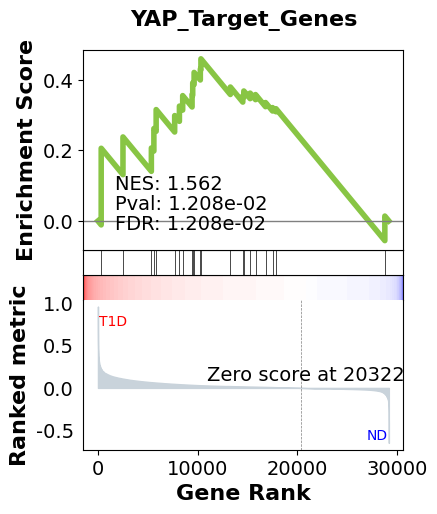

In [15]:
term = res.res2d.Term
axs = res.plot(terms='YAP_Target_Genes')

In [16]:
import time
import gseapy as gp
t1 = time.time()
res = gp.gsea(data=adata_subset_ductal.to_df().T, # row -> genes, column-> samples
        gene_sets="./yap_target_genes.gmt",
        cls=adata_subset_ductal.obs.status,
        permutation_num=1000,
        permutation_type='phenotype',
        outdir=None,
        method='s2n', # signal_to_noise
        threads= 16)
t2=time.time()
print(t2-t1)

/software/cellgen/team361/am74/envs/scanpy/lib/python3.10/site-packages/gseapy/gsea.py:173: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df_std.abs().sum(axis=1) > 0]


201.4102485179901


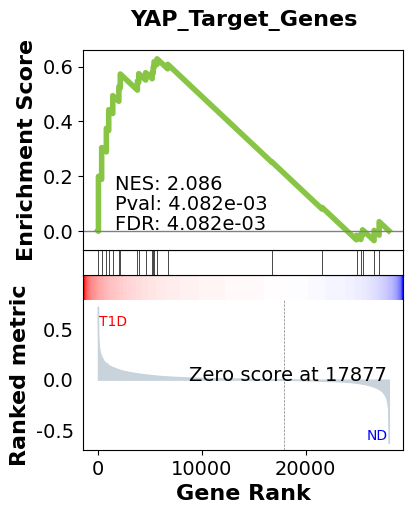

In [17]:
term = res.res2d.Term
axs = res.plot(terms='YAP_Target_Genes')

In [18]:
import time
import gseapy as gp
t1 = time.time()
res = gp.gsea(data=adata_subset_alpha.to_df().T, # row -> genes, column-> samples
        gene_sets="./yap_target_genes.gmt",
        cls=adata_subset_alpha.obs.status,
        permutation_num=1000,
        permutation_type='phenotype',
        outdir=None,
        method='s2n', # signal_to_noise
        threads= 16)
t2=time.time()
print(t2-t1)

/software/cellgen/team361/am74/envs/scanpy/lib/python3.10/site-packages/gseapy/gsea.py:173: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df_std.abs().sum(axis=1) > 0]


531.605146408081


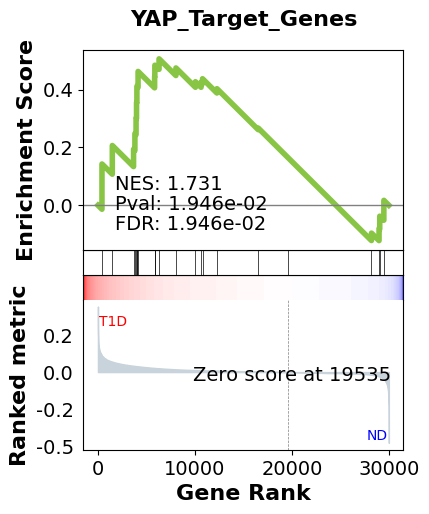

In [19]:
term = res.res2d.Term
axs = res.plot(terms='YAP_Target_Genes')

In [20]:
import time
import gseapy as gp
t1 = time.time()
res = gp.gsea(data=adata_subset_stellate.to_df().T, # row -> genes, column-> samples
        gene_sets="./yap_target_genes.gmt",
        cls=adata_subset_stellate.obs.status,
        permutation_num=1000,
        permutation_type='phenotype',
        outdir=None,
        method='s2n', # signal_to_noise
        threads= 16)
t2=time.time()
print(t2-t1)

/software/cellgen/team361/am74/envs/scanpy/lib/python3.10/site-packages/gseapy/gsea.py:173: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df_std.abs().sum(axis=1) > 0]


55.884108543395996


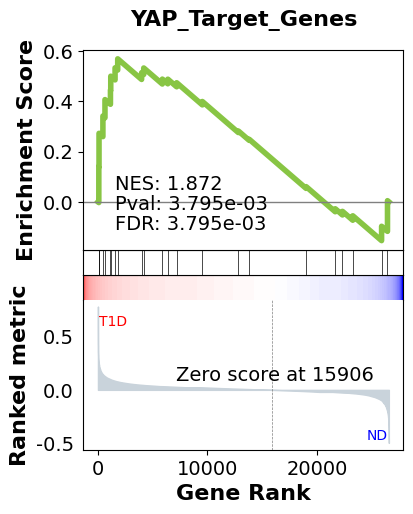

In [21]:
term = res.res2d.Term
axs = res.plot(terms='YAP_Target_Genes')

In [12]:
import time
import gseapy as gp
t1 = time.time()
res = gp.gsea(data=adata_subset_beta.to_df().T, # row -> genes, column-> samples
        gene_sets="GO_Biological_Process_2023",
        cls=adata_subset_beta.obs.status,
        permutation_num=1000,
        permutation_type='phenotype',
        outdir=None,
        method='s2n', # signal_to_noise
        threads= 16)
t2=time.time()
print(t2-t1)

/software/cellgen/team361/am74/envs/scanpy/lib/python3.10/site-packages/gseapy/gsea.py:173: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df_std.abs().sum(axis=1) > 0]


331.41933703422546


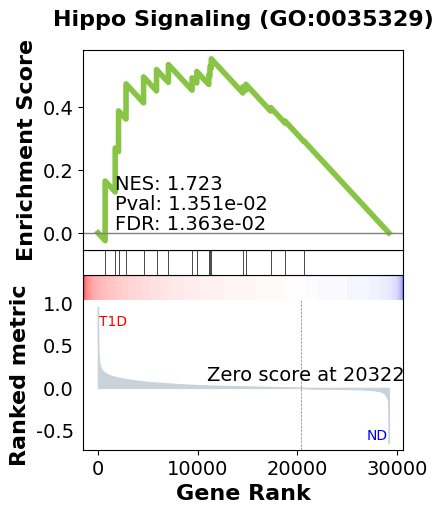

In [23]:
term = res.res2d.Term
# gp.gseaplot(res.ranking, term=term[i], **res.results[term[i]])
axs = res.plot(terms='Hippo Signaling (GO:0035329)')

In [24]:
res.res2d

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,gsea,Positive Regulation Of Leukocyte Mediated Cyto...,0.766826,3.221975,0.0,0.0,0.0,11/46,5.72%,HLA-B;HLA-E;HLA-C;HLA-A;LAMP1;HLA-G;HLA-F;HLA-...
1,gsea,RNA Export From Nucleus (GO:0006405),0.775133,2.997933,0.0,0.0,0.0,48/62,19.24%,HNRNPA1;SRSF3;HHEX;YTHDC1;HNRNPA2B1;THOC2;FYTT...
2,gsea,Regulation Of Macromolecule Metabolic Process ...,0.638887,2.969814,0.0,0.0,0.0,70/140,20.33%,FOXP1;APP;ZNF827;HNRNPDL;SORT1;CHD7;HMG20A;PEG...
3,gsea,Negative Regulation Of Nucleic Acid-Templated ...,0.596585,2.956481,0.0,0.0,0.0,252/433,26.81%,FOXP1;HNRNPK;FOXP2;RBPJ;DAP;KAT6A;RBBP4;MDM4;H...
4,gsea,Central Nervous System Development (GO:0007417),0.586581,2.950531,0.0,0.0,0.0,138/256,26.66%,MEIS2;COX7B;AHI1;RBBP4;BPTF;APP;SPTBN1;MSI2;PB...
...,...,...,...,...,...,...,...,...,...,...
2617,gsea,Prostanoid Metabolic Process (GO:0006692),-0.271069,-0.765373,0.794979,0.830751,1.0,2/16,1.88%,PTGR1;GSTM1
2618,gsea,Long-Chain Fatty Acid Biosynthetic Process (GO...,0.201898,0.731087,0.847561,0.857206,1.0,9/23,39.17%,ALOX5;FADS1;ELOVL6;CYP1A1;GSTM2;GSTP1;ALOX12;C...
2619,gsea,Dicarboxylic Acid Transport (GO:0006835),0.199024,0.679807,0.919149,0.909184,1.0,2/21,12.17%,SLC17A6;SLC25A32
2620,gsea,Positive Regulation Of Positive Chemotaxis (GO...,-0.226938,-0.658781,0.898876,0.930795,1.0,1/16,0.27%,VEGFB


/software/cellgen/team361/am74/envs/scanpy/lib/python3.10/site-packages/gseapy/plot.py:738: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[self.colname] = df[self.colname].replace(0, np.nan).bfill()


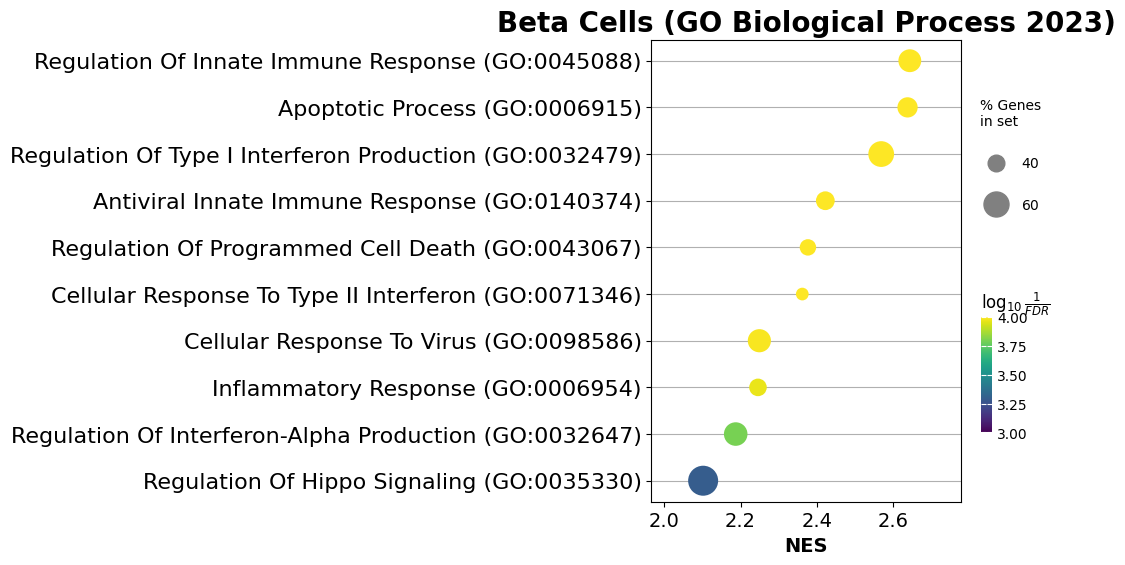

In [15]:
from gseapy import dotplot
import matplotlib.pyplot as plt

filtered_res = res.res2d[res.res2d['Term'].isin([
    'Regulation Of Hippo Signaling (GO:0035330)',
    'Inflammatory Response (GO:0006954)',
    'Antiviral Innate Immune Response (GO:0140374)',
    'Regulation Of Innate Immune Response (GO:0045088)',
    'Regulation Of Type I Interferon Production (GO:0032479)',
    'Cellular Response To Type II Interferon (GO:0071346)',
    'Regulation Of Interferon-Alpha Production (GO:0032647)',
    'Cellular Response To Virus (GO:0098586)',
    'Apoptotic Process (GO:0006915)',
    'Regulation Of Programmed Cell Death (GO:0043067)'
])]

# Ensure filtered data has more than one row or select a categorical variable if needed
ax = dotplot(filtered_res, 
             column="FDR q-val",
             title='Beta Cells (GO Biological Process 2023)',
             cmap=plt.cm.viridis,
             y='Term',  # Use the y-axis as 'Term' to avoid mismatched size issues
             size=5,
             figsize=(5,6), 
             cutoff=1)
              # ofname="./beta_cells_GSEA_Interested_terms.png")
plt.show()


/software/cellgen/team361/am74/envs/scanpy/lib/python3.10/site-packages/gseapy/plot.py:738: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[self.colname] = df[self.colname].replace(0, np.nan).bfill()


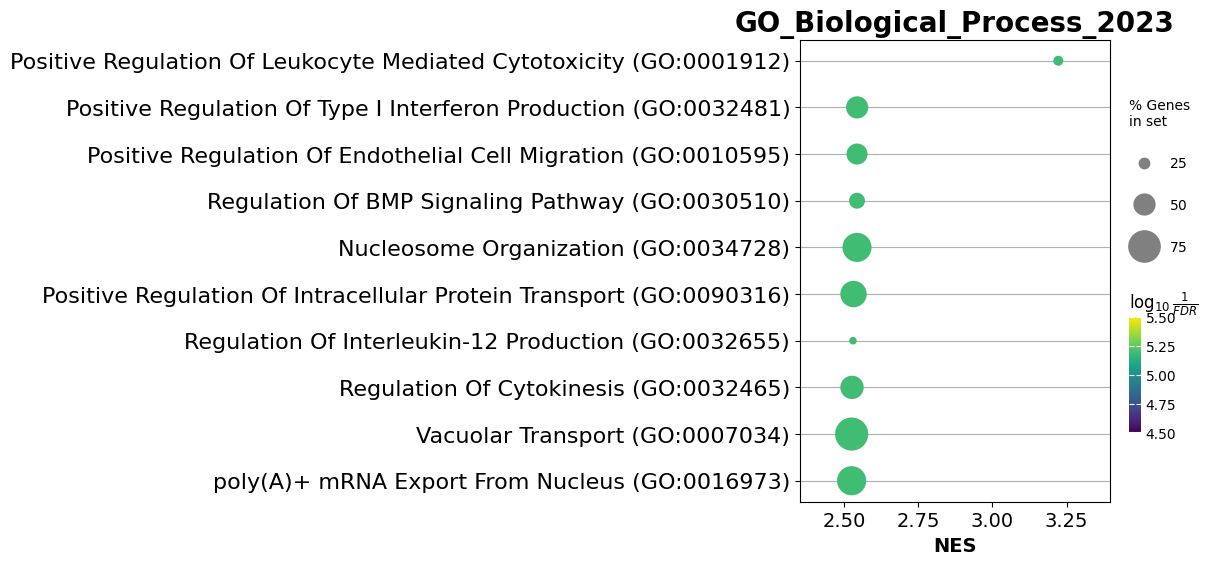

In [26]:
from gseapy import dotplot
# to save your figure, make sure that ``ofname`` is not None
ax = dotplot(res.res2d,
             column="FDR q-val",
             title='GO_Biological_Process_2023',
             cmap=plt.cm.viridis,
             size=5,
             figsize=(5,6), cutoff=0.05)

In [27]:
t1 = time.time()
res = gp.gsea(data=adata_subset_alpha.to_df().T, # row -> genes, column-> samples
        gene_sets="GO_Biological_Process_2023",
        cls=adata_subset_alpha.obs.status,
        permutation_num=1000,
        permutation_type='phenotype',
        outdir=None,
        method='s2n', # signal_to_noise
        threads= 16)
t2=time.time()
print(t2-t1)

/software/cellgen/team361/am74/envs/scanpy/lib/python3.10/site-packages/gseapy/gsea.py:173: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df_std.abs().sum(axis=1) > 0]


613.8032734394073


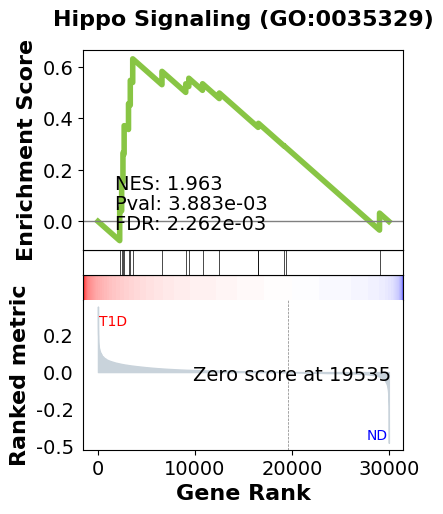

In [28]:
term = res.res2d.Term
# gp.gseaplot(res.ranking, term=term[i], **res.results[term[i]])
axs = res.plot(terms='Hippo Signaling (GO:0035329)')

In [29]:
t1 = time.time()
res = gp.gsea(data=adata_subset_ductal.to_df().T, # row -> genes, column-> samples
        gene_sets="GO_Biological_Process_2023",
        cls=adata_subset_ductal.obs.status,
        permutation_num=1000,
        permutation_type='phenotype',
        outdir=None,
        method='s2n', # signal_to_noise
        threads= 16)
t2=time.time()
print(t2-t1)

/software/cellgen/team361/am74/envs/scanpy/lib/python3.10/site-packages/gseapy/gsea.py:173: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df_std.abs().sum(axis=1) > 0]


259.14456605911255


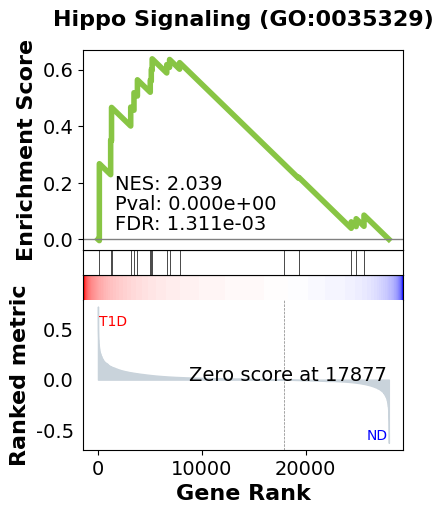

In [30]:
term = res.res2d.Term
# gp.gseaplot(res.ranking, term=term[i], **res.results[term[i]])
axs = res.plot(terms='Hippo Signaling (GO:0035329)')

In [31]:
t1 = time.time()
res = gp.gsea(data=adata_subset_stellate.to_df().T, # row -> genes, column-> samples
        gene_sets="GO_Biological_Process_2023",
        cls=adata_subset_stellate.obs.status,
        permutation_num=1000,
        permutation_type='phenotype',
        outdir=None,
        method='s2n', # signal_to_noise
        threads= 16)
t2=time.time()
print(t2-t1)

/software/cellgen/team361/am74/envs/scanpy/lib/python3.10/site-packages/gseapy/gsea.py:173: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df_std.abs().sum(axis=1) > 0]


95.22837257385254


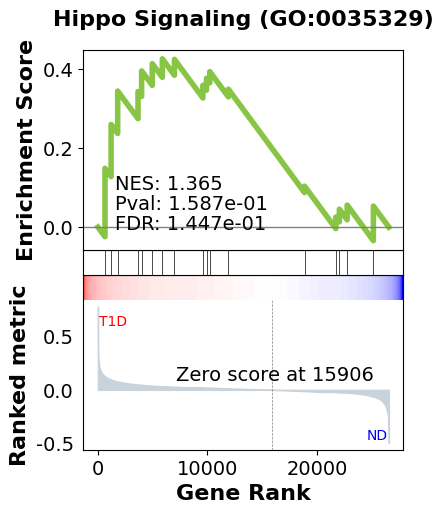

In [32]:
term = res.res2d.Term
# gp.gseaplot(res.ranking, term=term[i], **res.results[term[i]])
axs = res.plot(terms='Hippo Signaling (GO:0035329)')